Chapter 11 Mathematical Tools


In [2]:
import numpy as np
from pylab import plt, mpl

In [3]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
def f(x):
    return np.sin(x)+0.5*x

In [5]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [6]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)

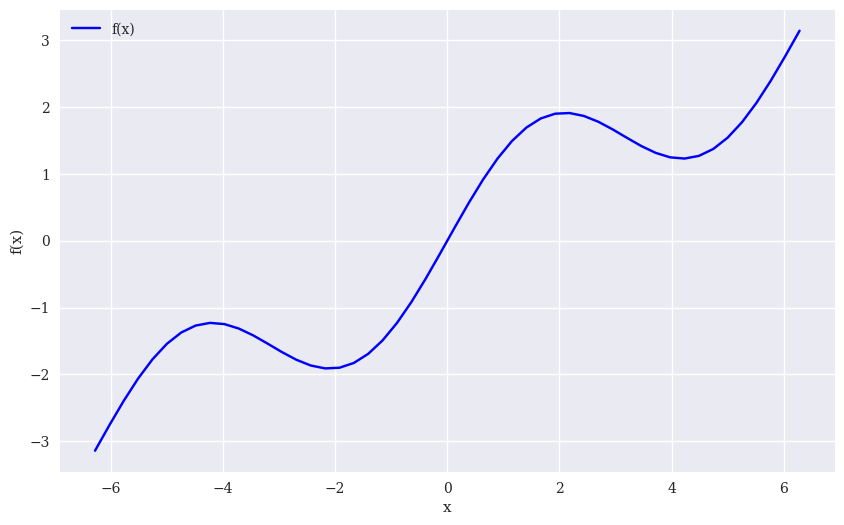

In [7]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

Figure 11-1 Example function plot

In [ ]:
res = np.polyfit(x, f(x), deg=1, full=True) # linear regression step


In [ ]:
res
# full results: regression parameters, residuals, effective rank, singular values, and relative condition number.

(array([ 4.28841952e-01, -6.57465478e-17]),
 array([21.03238686]),
 np.int32(2),
 array([1., 1.]),
 np.float64(1.1102230246251565e-14))

In [ ]:
ry = np.polyval(res[0], x)
# evaluation using the regression parameters

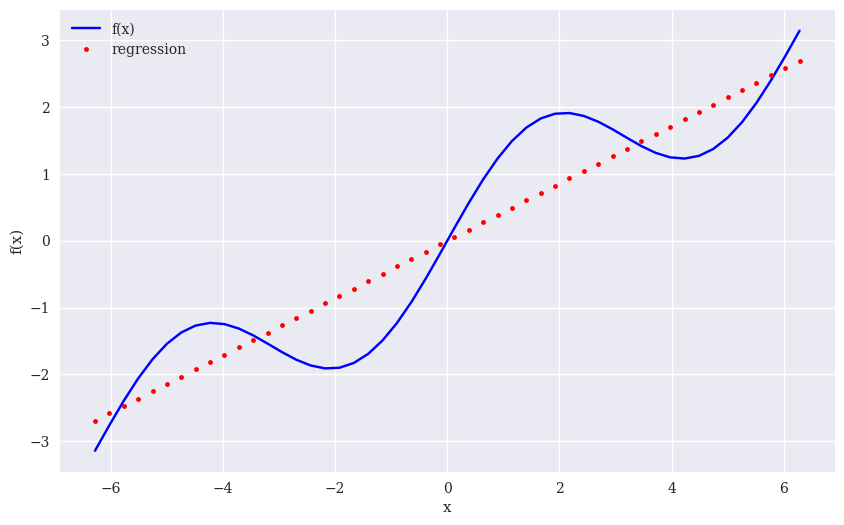

In [12]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

In [13]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

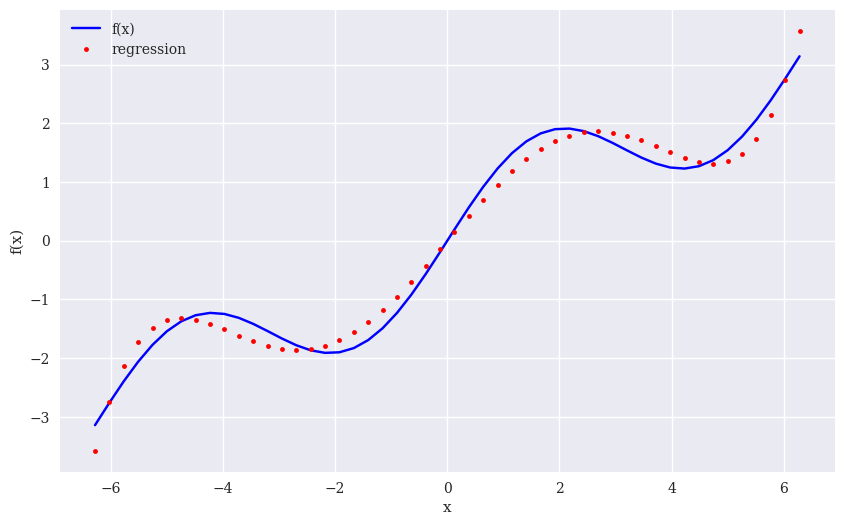

In [14]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-3. Regression with monomials up to order 5

In [15]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [ ]:
np.allclose(f(x),ry) # Checks whether the function and regression values are the same (or at least close)

False

In [ ]:
np.mean((f(x)-ry)**2) # calculates the mean squared error(MSE) for the regression values given the function values

np.float64(0.001776913475951764)

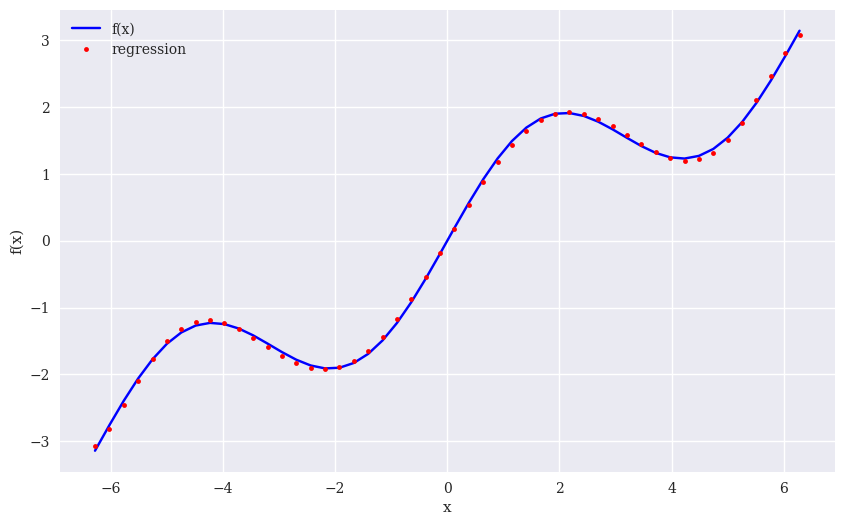

In [18]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-4. Regression with monomials up to order 7

In [19]:
matrix = np.zeros((3+1, len(x)))
matrix[3,:] = x**3
matrix[2,:] = x**2
matrix[1,:] = x
matrix[0,:] = 1

In [ ]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0] # regression step

In [ ]:
reg.round(4) # optimal regressio parameters

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [ ]:
ry = np.dot(reg, matrix) # regression estimates for the function values.

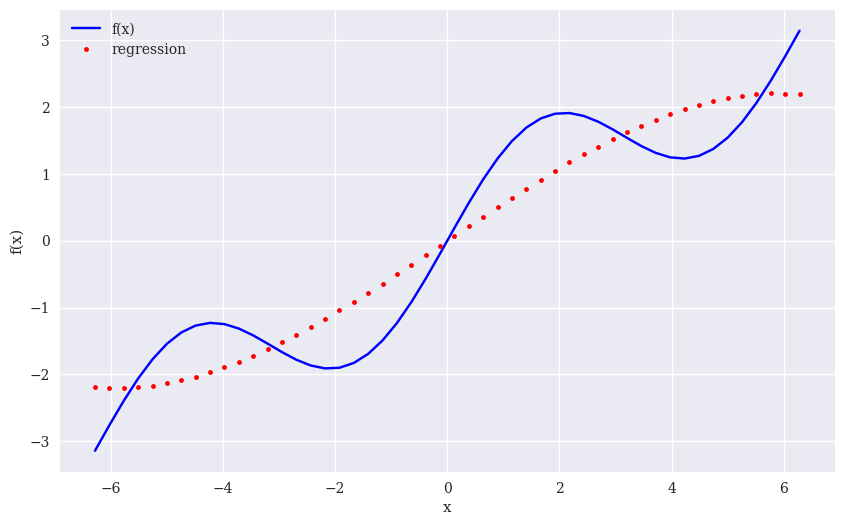

In [24]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-5. Regression with individual basis functions

In [25]:
matrix[3,:] = np.sin(x)

In [26]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [27]:
reg.round(4)

array([ 0. ,  0.5, -0. ,  1. ])

In [28]:
ry = np.dot(reg, matrix)

In [29]:
np.allclose(f(x), ry)

True

In [30]:
np.mean((f(x) - ry )**2)

np.float64(9.741353658710639e-31)

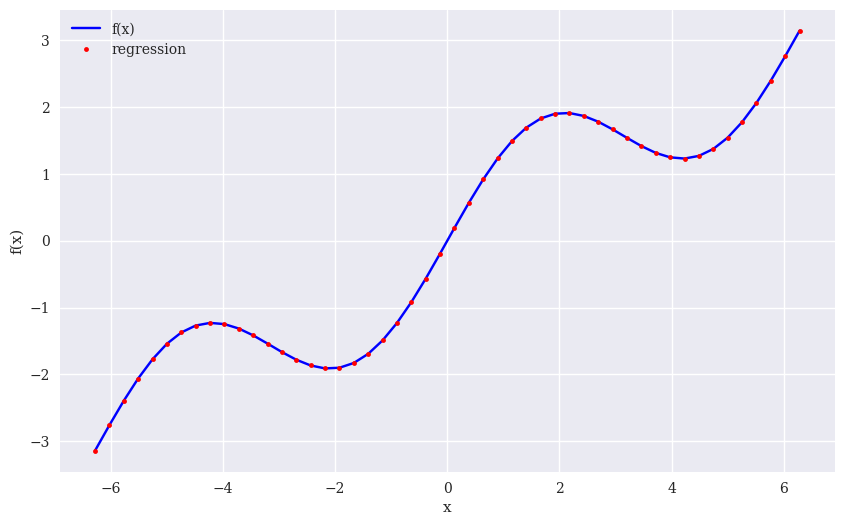

In [31]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-6. Regression with the sine basis function

In [32]:
xn = np.linspace(-2*np.pi, 2*np.pi, 50)
xn = xn +0.15*np.random.standard_normal(len(xn))
yn = f(xn) +0.25*np.random.standard_normal(len(xn))

In [33]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

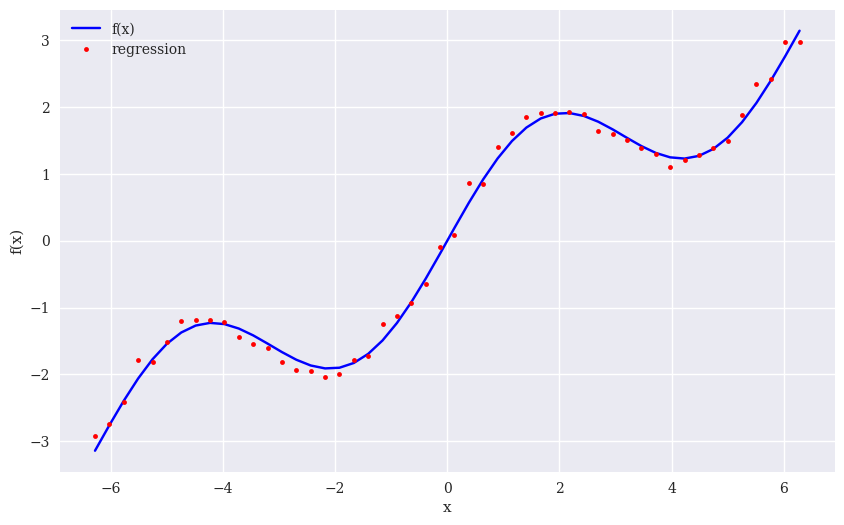

In [34]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-7. Regression for noisy data

In [ ]:
xu = np.random.rand(50)*4*np.pi -2*np.pi # randomize x value
yu = f(xu)

In [42]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 1.37 -3.87  6.25 -2.25  1.98  4.74  0.26  3.38 -4.95 -4.98]
[ 1.66 -1.27  3.08 -1.9   1.91  1.37  0.39  1.45 -1.51 -1.53]


In [43]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

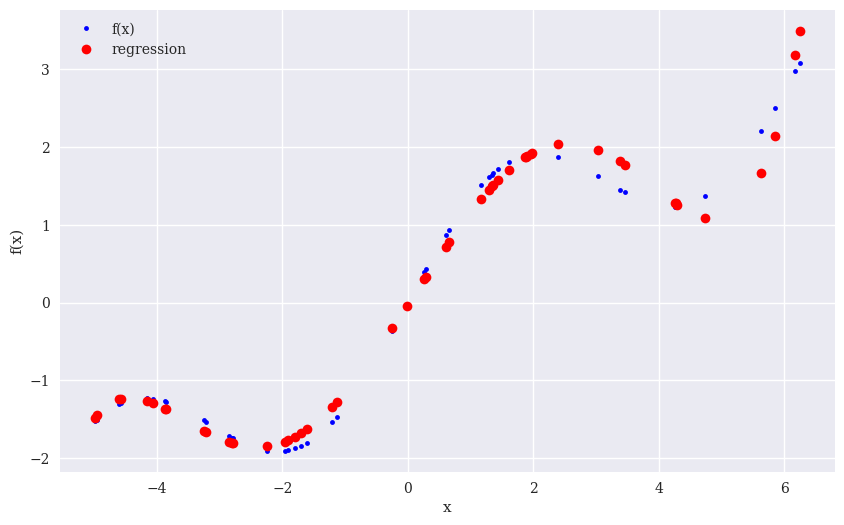

In [45]:
create_plot([xu,xu], [yu, ry], ['b.', 'ro'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-8. Regressio nfro unsorted data.

In [46]:
def fm(p):
    x, y =p
    return np.sin(x) +0.25*x + np.sqrt(y)+0.05*y**2

In [47]:
x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
X,Y = np.meshgrid(x,y)

In [48]:
Z = fm((X,Y))
x=X.flatten()
y=Y.flatten()

In [49]:
from mpl_toolkits.mplot3d import Axes3D

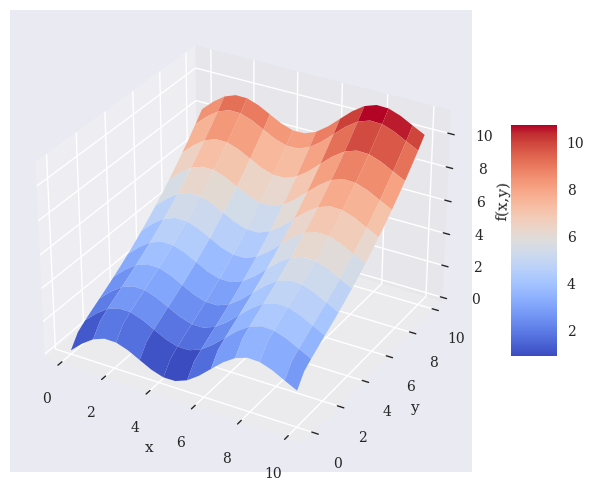

In [52]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [53]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [55]:
reg = np.linalg.lstsq(matrix, fm(((x,y))), rcond=None)[0]

In [56]:
RZ = np.dot(matrix, reg).reshape((20,20))

/tmp/ipykernel_13407/257621701.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 3 Axes> than <Figure size 1000x600 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(surf, shrink=0.5, aspect=5)


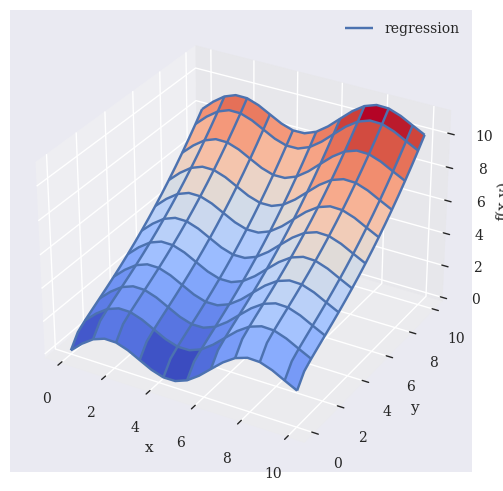

In [58]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2= ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

Figure 11-10. Regression surface for function with two parameters

In [59]:
import scipy.interpolate as spi

In [61]:
x = np.linspace(-2*np.pi, 2*np.pi, 25)

In [62]:
def f(x):
    return np.sin(x)+0.5*x

In [63]:
ipo = spi.splrep(x, f(x), k=1)

In [64]:
iy = spi.splev(x, ipo)

In [65]:
np.allclose(f(x), iy)

True

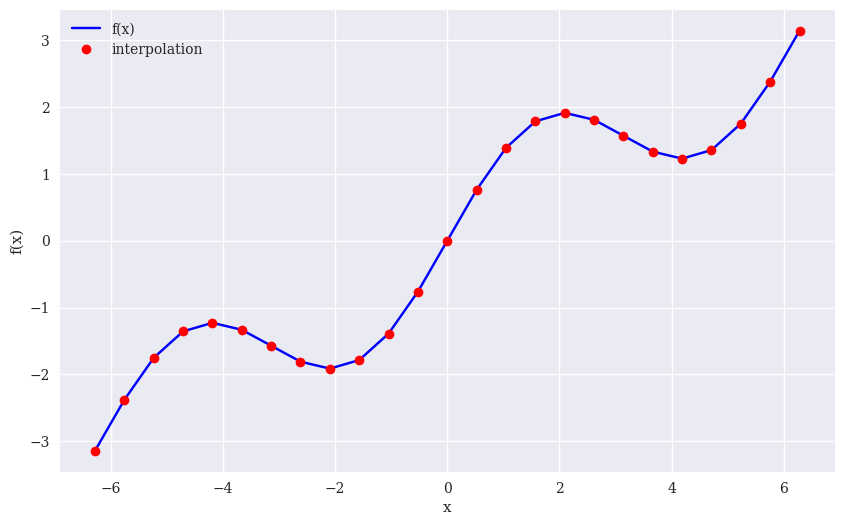

In [66]:
create_plot([x,x],[f(x),iy],['b','ro'],['f(x)', 'interpolation'], ['x', 'f(x)'])

Figure 11-11. L?inear splines interpolation (complete data set)

In [67]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

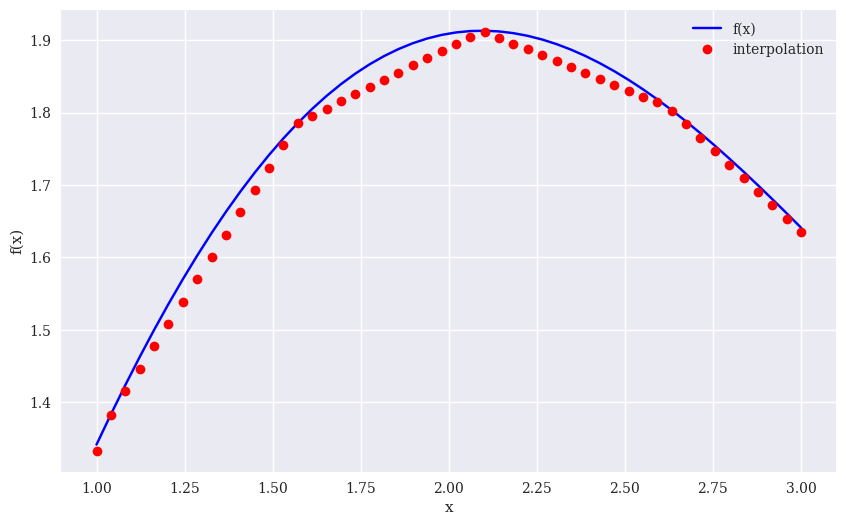

In [68]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
['f(x)', 'interpolation'], ['x', 'f(x)'])

Figure 11-12. Linear splines interpolation (data subset)

In [69]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

In [70]:
np.allclose(f(xd), iyd)

False

In [71]:
np.mean((f(xd) - iyd) ** 2)

np.float64(1.1349319851436252e-08)

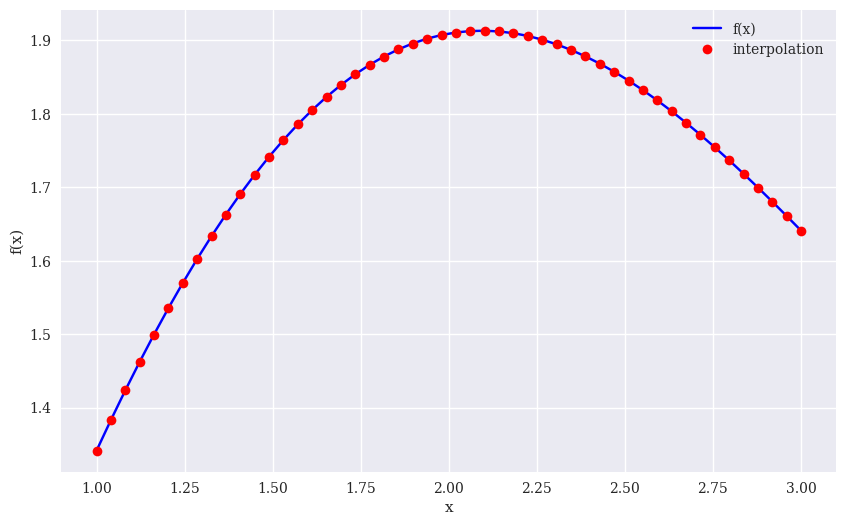

In [72]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
['f(x)', 'interpolation'], ['x', 'f(x)'])

Figure 11-13. Cubic splines interpolation (data subset)

In [73]:
def fm(p):
    x,y=p
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)

In [74]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

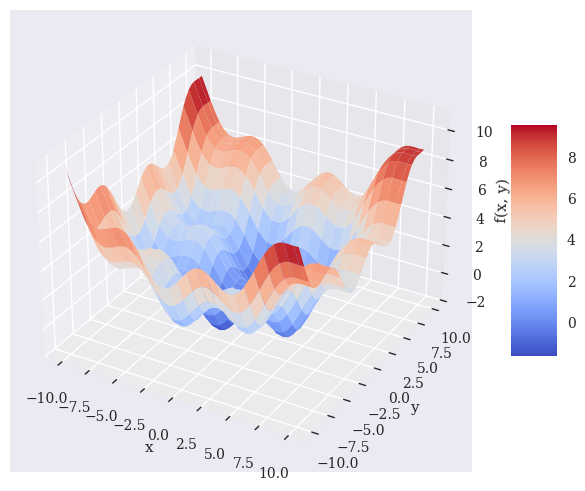

In [76]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
cmap='coolwarm', linewidth=0.5,
antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

Figure 11-14. Linear splines interpolation (data subset)

In [77]:
import scipy.optimize as sco

In [83]:
def fo(p):
    x,y=p
    z = np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2
    if output == True:
        print('%8.4f|%8.4f|%8.4f' % (x,y,z))
    return z

In [84]:
output = True
sco.brute(fo,((-10,10.1, 5), (-10,10.1, 5)), finish=None)

-10.0000|-10.0000| 11.0880
-10.0000| -5.0000|  7.7529
-10.0000|  0.0000|  5.5440
-10.0000|  5.0000|  5.8351
-10.0000| 10.0000| 10.0000
 -5.0000|-10.0000|  7.7529
 -5.0000| -5.0000|  4.4178
 -5.0000|  0.0000|  2.2089
 -5.0000|  5.0000|  2.5000
 -5.0000| 10.0000|  6.6649
  0.0000|-10.0000|  5.5440
  0.0000| -5.0000|  2.2089
  0.0000|  0.0000|  0.0000
  0.0000|  5.0000|  0.2911
  0.0000| 10.0000|  4.4560
  5.0000|-10.0000|  5.8351
  5.0000| -5.0000|  2.5000
  5.0000|  0.0000|  0.2911
  5.0000|  5.0000|  0.5822
  5.0000| 10.0000|  4.7471
 10.0000|-10.0000| 10.0000
 10.0000| -5.0000|  6.6649
 10.0000|  0.0000|  4.4560
 10.0000|  5.0000|  4.7471
 10.0000| 10.0000|  8.9120


array([0., 0.])